In [50]:
import pickle
import psycopg2 as pg
import math

host = 'localhost'
dbname = 'gdelt'
password = 'pgpw'

con = pg.connect(host=host, database=dbname, password=password, user='postgres')

soc = ['facebook.com', 'twitter.com', 'instagram.com', 'youtube.com', 't.co', 'linkedin.com', \
       'google.com', 'flickr.com', 'wordpress.com', 'blogspot.com', 'mail.ru']

In [51]:
query = 'SELECT * FROM alinks'
cur = con.cursor()
cur.execute(query)
fulldata = cur.fetchall()
#print(sum([1 for x in data if x[2] == x[3]])/len(data))
print(len(fulldata))

1123634


In [52]:
samps = {}
for datum in fulldata:
    #print(datum)
    if datum[2] not in soc and datum[3] not in soc:
        if datum[2] not in samps:
            samps[datum[2]] = []
        samps[datum[2]].append(datum[2])
    
minsamp = 2
sigdata = [datum for datum in fulldata if datum[2] in samps and len(samps[datum[2]]) > minsamp and datum[3] in samps and len(samps[datum[3]]) > minsamp]

print("Significant Links: " + str(len(sigdata)))

edgew = {}
for datum in sigdata:
    if datum[2] not in edgew:
        edgew[datum[2]] = {}
    if datum[3] not in edgew[datum[2]]:
        edgew[datum[2]][datum[3]] = 0
    edgew[datum[2]][datum[3]] += 1
        
mutdata = [datum for datum in sigdata if datum[3] in edgew and datum[2] in edgew[datum[3]]]

print("Mutual Links: " + str(len(mutdata)))

nlinks = {}
for datum in mutdata:
    if datum[2] not in nlinks:
        nlinks[datum[2]] = 0
    nlinks[datum[2]] += 1
#print(nlinks)

counts = {}
lfrac = {}
for datum in mutdata:
    if datum[2] not in counts:
        lfrac[datum[2]] = {}
        counts[datum[2]] = {}
    if datum[3] not in counts[datum[2]]:
        lfrac[datum[2]][datum[3]] = 0
        counts[datum[2]][datum[3]] = 0
    counts[datum[2]][datum[3]] += 1
    lfrac[datum[2]][datum[3]] += 1 / nlinks[datum[2]]

Significant Links: 130096
Mutual Links: 61301


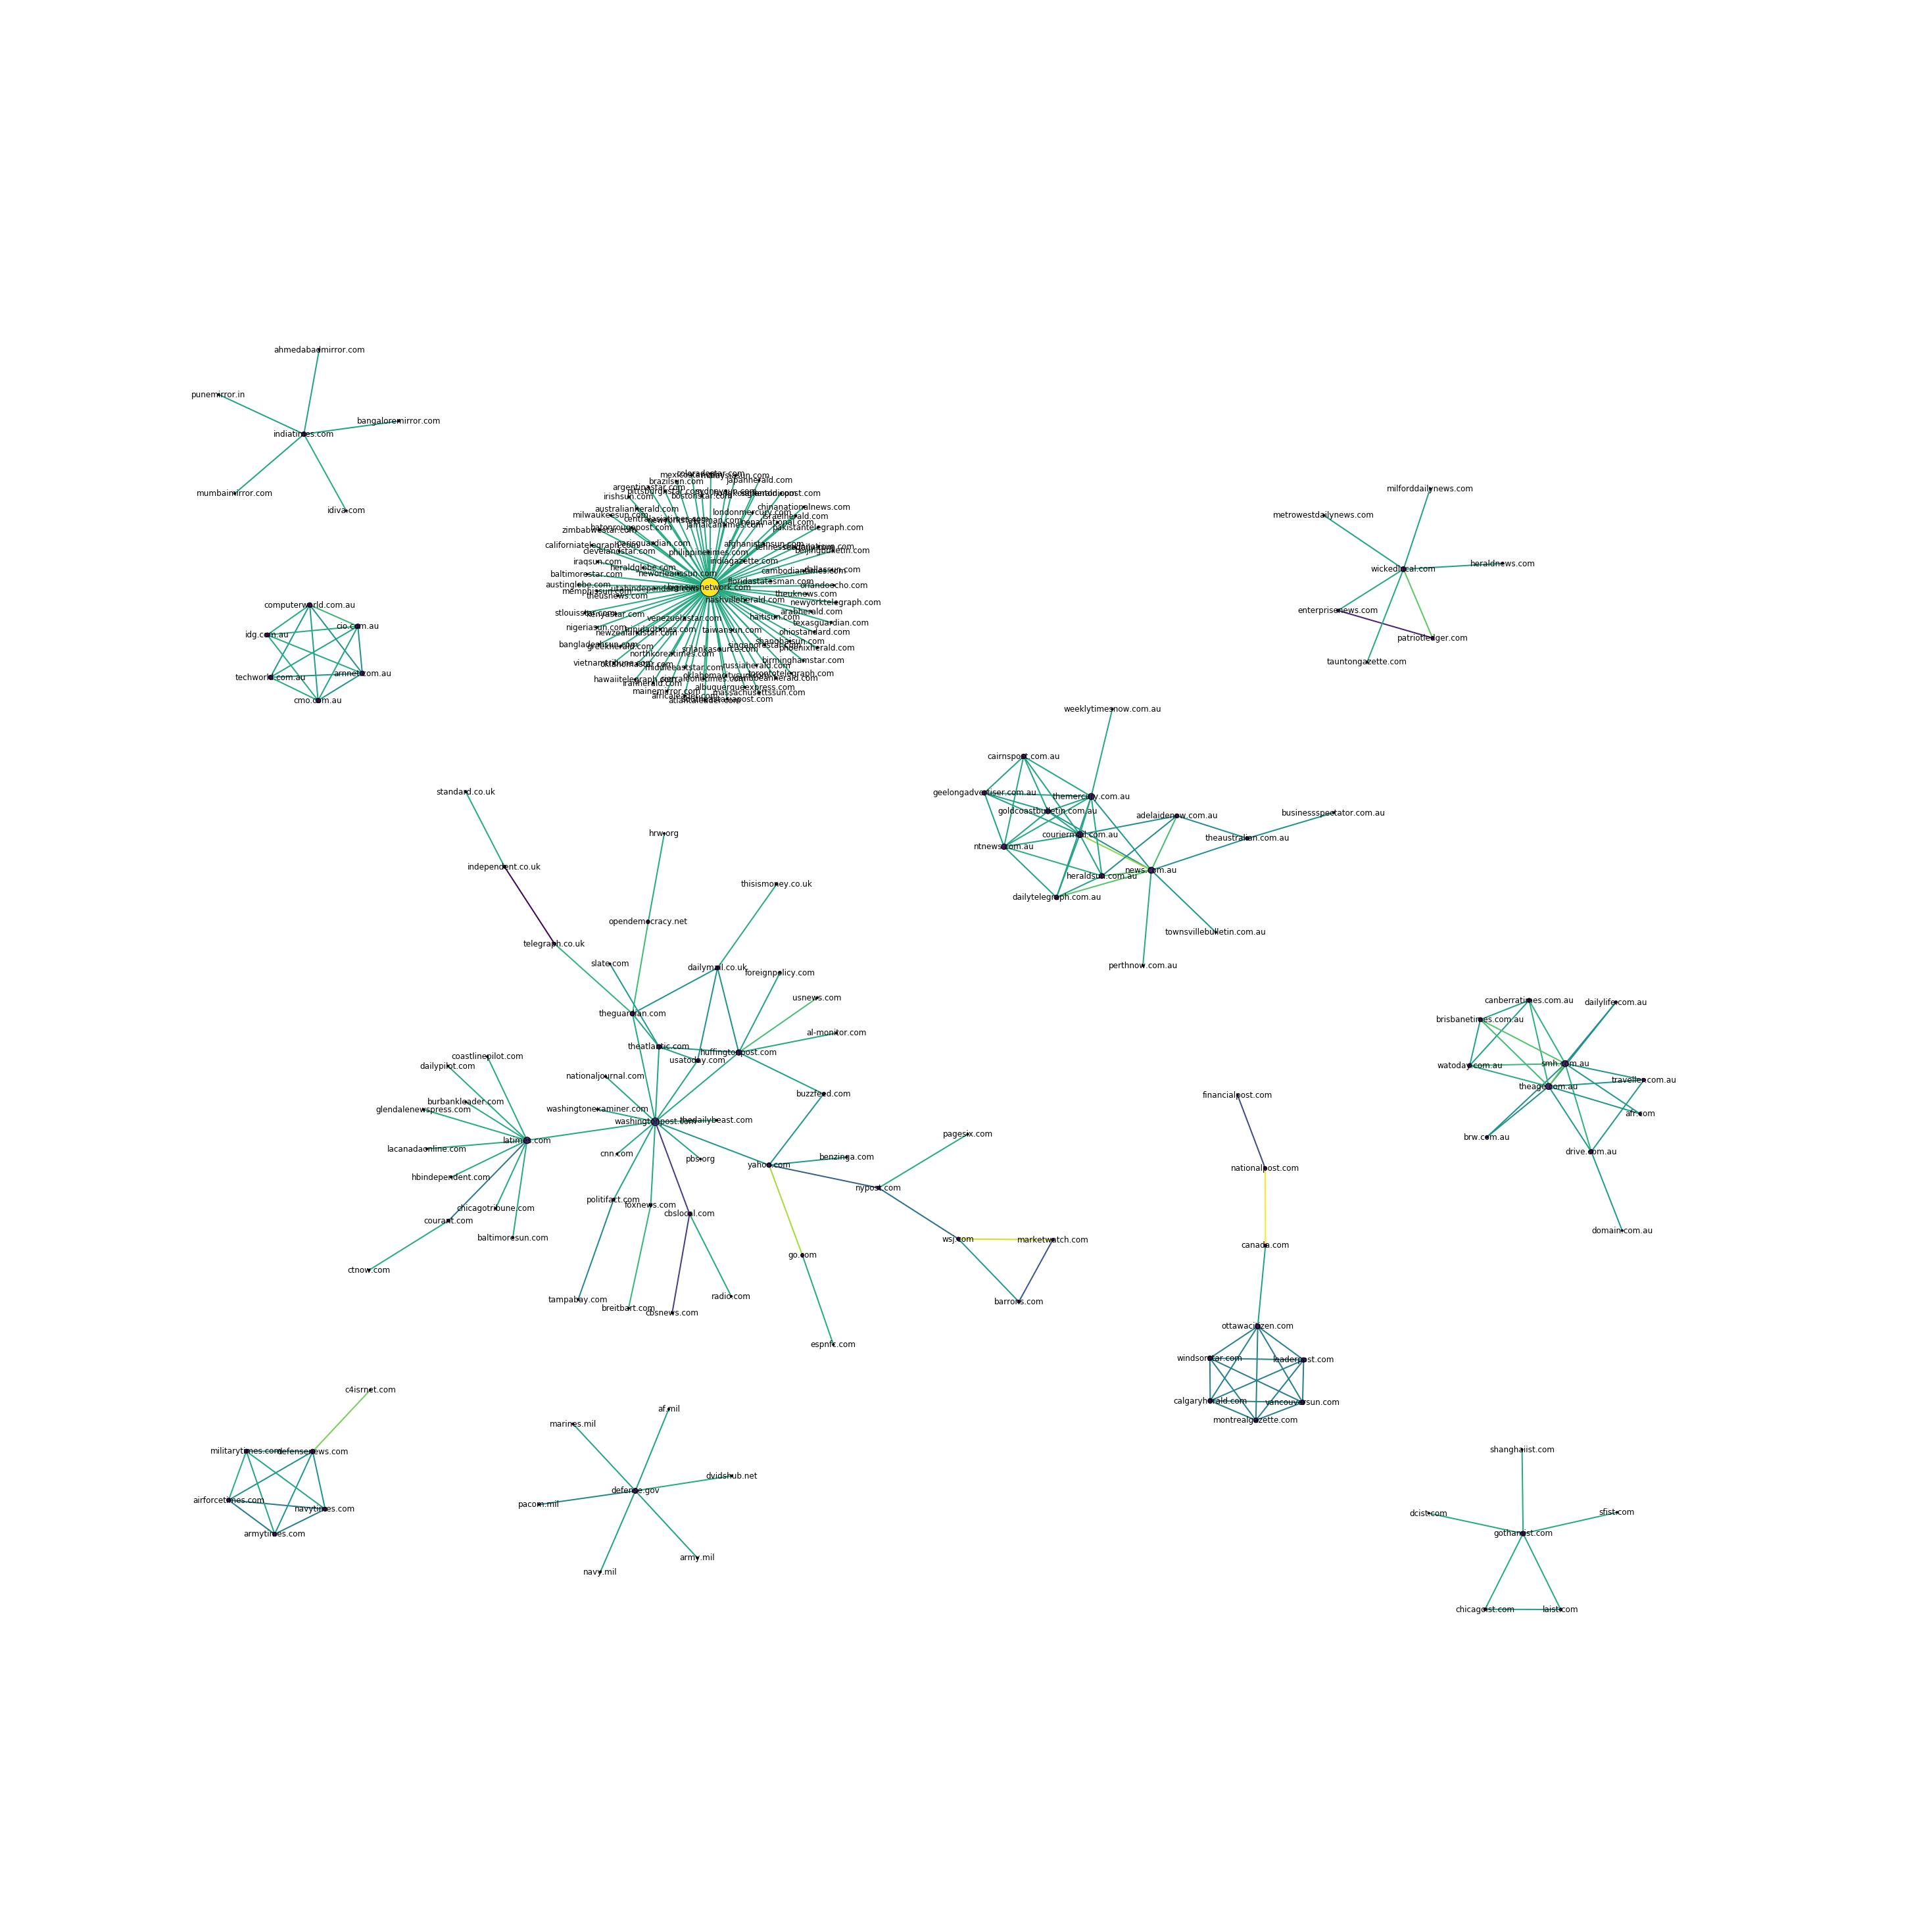

saved


In [53]:
import matplotlib.pyplot as plt
import networkx as nx
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
import random


#sample = 35000

        
        
#print(counts)

G = nx.Graph()
for src in counts:
    for dst in counts[src]:
        if dst not in soc:
            if dst in counts and src in counts[dst]:
                #print())
                if counts[dst][src] > 1 and counts[src][dst] > 1:
                    sa = sum([counts[src][x] for x in counts[src]])
                    a = counts[src][dst]/sa - 1/len(counts[src])
                    sb = sum([counts[dst][x] for x in counts[dst]])
                    b = counts[dst][src]/sb - 1/len(counts[dst])
                    G.add_edge(src, dst, weight=min(a, b))
    
plt.figure(1, (40, 40))

#print(G.edge[0])
#for no
#    print(edge[0])
#giant = max(nx.connected_component_subgraphs(G.to_undirected()), key=len)
chunks = [g for g in nx.connected_component_subgraphs(G.to_undirected()) if len(g) > 5]
giant = nx.Graph()
for chunk in chunks:
    giant = nx.compose(giant, chunk)
#print(giant)

#        c = [random.random()] * nx.number_of_nodes(g) # random color...
pos = graphviz_layout(giant, prog="neato")
#sizer = [40*sum([edge[2]['weight'] if edge[1] == node else 0 for edge in G2.edges(node, data=True)]) for node in G2.nodes()]
#for node in G2.nodes():
#    for edge in G2.edges(node, data=True):
#        print(node + ": " + str(edge))
ns = [0]*len(giant.nodes())
for edge in giant.edges(data=True):
    ns[giant.nodes().index(edge[0])] += 10
    ns[giant.nodes().index(edge[1])] += 10
    #print(edge)
    #sizes[G2.nodes().index(edge[1])] += 10*edge[2]['weight']
    #sizes[G2.nodes().index(edge[0])] += 10*edge[2]['weight']
#print(ns)
ec = [edge[2]['weight'] for edge in giant.edges(data=True)]
nx.draw(giant, pos, node_size=ns,
        node_color=ns, edge_color=ec,
        width=2, edge_cmap=plt.cm.viridis,
        cmap=plt.cm.viridis, with_labels=True)
# nx.draw(giant, pos, node_size=ns,
#         node_color=ns, edge_color=ec,
#         width=2, edge_cmap=plt.cm.viridis,
#         cmap=plt.cm.viridis, with_labels=True)
    #for deg in g.degree_iter():
    #    print(deg)
#nx.draw_networkx_labels(giant, pos)

plt.show()
#plt.savefig("graph")
print("saved")

its TIME


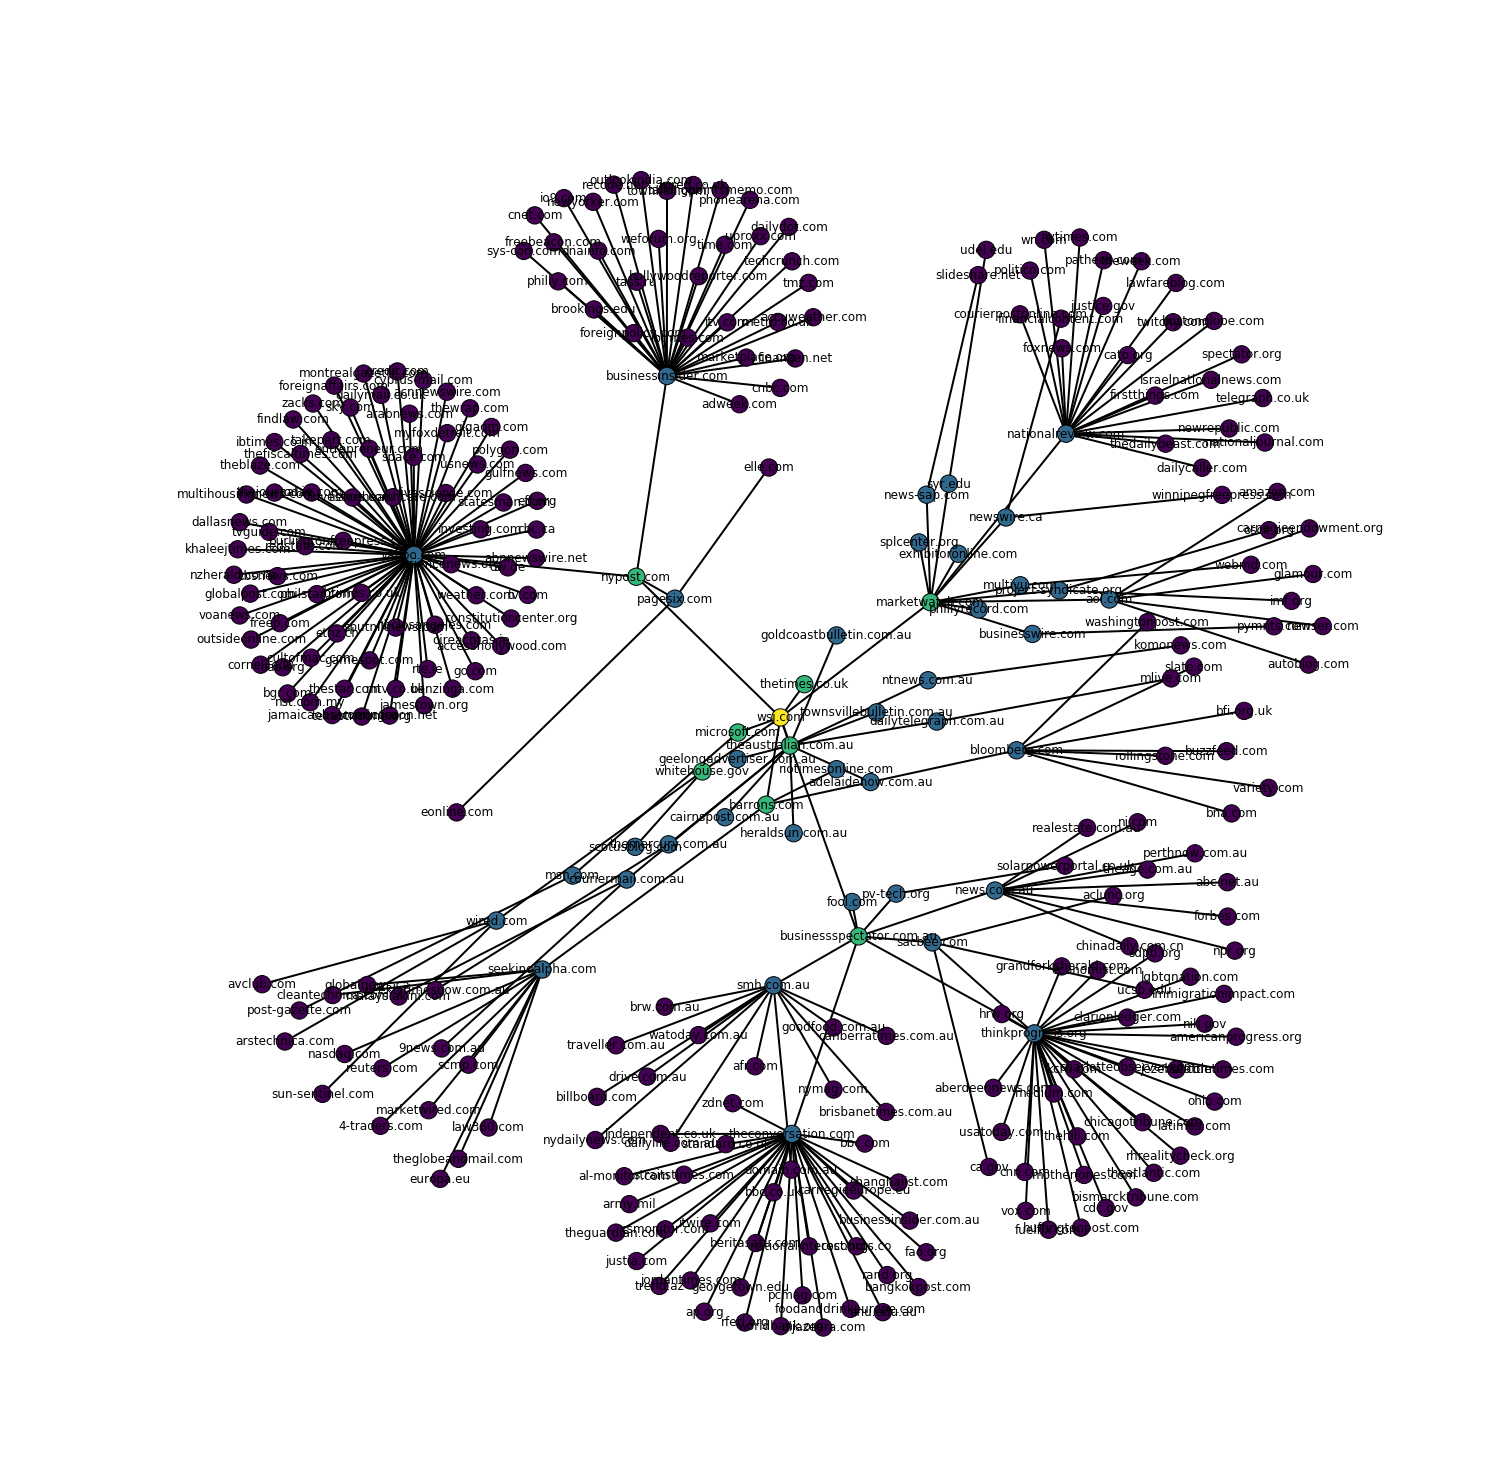

In [43]:
def webTree(root):
    visited = []
    queue = [(root, 0)]
    tree = nx.Graph()
    while len(queue) > 0:
        src = queue[0][0]
        level = queue[0][1]
        #print(src)
        visited.append(src)
        queue.pop(0)
        legs = [datum for datum in sigdata if datum[2] == src]
        #print(legs)
        #print(legs)
        for leg in legs:
            #print(leg[3])
            #if level < 4 and leg[3] not in queue and leg[3] not in soc:
            if level < 3 and leg[3] not in visited and leg[3] not in queue and leg[3] not in soc:
                tree.add_edge(src, leg[3])
                queue.append((leg[3], level+1))
                visited.append(leg[3])
            #    queue.append(leg[3])
    #pos = graphviz_layout(tree, prog="circo")
    print("its TIME")
    plt.figure(figsize=(20, 20))
    pos = graphviz_layout(tree, prog="neato", root=root)
    spl = nx.all_pairs_shortest_path_length(tree)
    nx.draw(tree, pos, width=2,
            node_color=[spl[d][root] for d in tree.nodes()],
            cmap=plt.cm.viridis_r, with_labels=True)
    plt.show()
        
webTree("wsj.com")